<p style="
    background-color: #0A0A0A;
    color: #C2A9D9;
    font-size: 200%;
    font-weight: bold;
    text-align: center;
    border-radius: 0px;
    border: 2px solid #BC13FE;
    padding: 12px 20px;
    text-shadow: 0 0 8px #BC13FE, 0 0 20px rgba(188, 19, 254, 0.6);
    box-shadow: 0 0 15px rgba(188, 19, 254, 0.5);
    font-family: 'Orbitron', 'Arial Black', sans-serif;
    letter-spacing: 1.5px;
    text-transform: uppercase;
    ">Exoplanet Habitability</p>

In [741]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import pyplot
import math
import matplotlib.lines as mlines
from astropy.modeling import models, fitting
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [742]:
exo_df=pd.read_csv("Exoplanets_all.csv")

In [743]:
#This the generalplot style setting
plt.rcParams.update({
    'font.family': 'Palatino Linotype',
    'axes.labelsize': 20,
    'axes.titlesize': 25,
    'xtick.labelsize': 19,
    'ytick.labelsize': 19,
    'legend.fontsize': 16,
    'figure.figsize': (7, 7),
    'lines.linewidth': 5,
    'grid.alpha': 0.5,
    
    # Bold title & spacing
    'axes.titleweight': 'bold',  # Makes title bold globally
    'axes.titlepad': 10,         # Default padding between title and plot (in points)
    'axes.labelweight': 'bold',
})

In [744]:
colors = {
    "yellow": "#ffba55",
    "red": "#e100b0",
    "green": "#32ba7d",
    "blue": "#2b7ae0",
    "orange": "#fc5801"
}

In [745]:
# Renaming the columns
column_dict = {
    'pl_name': 'Planet Name',
    'hostname': 'Host Name',
    'sy_snum': 'Number of Stars',
    'sy_pnum': 'Number of Planets',
    'sy_mnum': 'Number of Moons',
    'discoverymethod': 'Detection Method',
    'disc_year': 'Discovery Year',
    'disc_locale': 'Discovery Locale',
    'disc_facility': 'Discovery Facility',
    'disc_telescope': 'Discovery Telescope',
    'pl_controv_flag': 'Controversial Flag',
    'pl_orbper': 'Orbital Period',
    'pl_orbsmax': 'Orbit Semi-Major Axis',
    'pl_rade': 'Planet Radius',
    'pl_radj': 'Radius [Jupiter]',
    'pl_bmasse': 'Planet Mass',
    'pl_bmassj': 'Mass [Jupiter]',
    'pl_bmassprov': 'Mass Provenance',
        'pl_dens': 'Planet Density',
    'pl_orbeccen': 'Eccentricity',
    'pl_insol': 'Insolation Flux',
    'pl_eqt': 'Equilibrium Temperature',
    'pl_orbincl': 'Inclination',
    'pl_tranmid': 'Transit Midpoint',
    'ttv_flag': 'TTV Flag',
    'pl_imppar': 'Impact Parameter',
    'pl_trandep': 'Transit Depth',
    'pl_trandur': 'Transit Duration',
    'pl_ratdor': 'Axis-Stellar Ratio',
    'pl_ratror': 'Planet-Stellar Ratio',
    'pl_occdep': 'Occultation Depth',
    'pl_orbtper': 'Periastron Epoch',
    'pl_orblper': 'Periastron Argument',
    'pl_rvamp': 'RV Amplitude',
    'pl_projobliq': 'Projected Obliquity',
    'pl_trueobliq': 'True Obliquity',
    'st_spectype': 'Spectral Type',
    'st_teff': 'Stellar Effective Temperature',
    'st_rad': 'Stellar Radius',
    'st_mass': 'Stellar Mass',
    'st_met': 'Metallicity',
    'st_metratio': 'Metallicity Ratio',
    'st_lum': 'Stellar Luminosity',
    'st_logg': 'Surface Gravity',
    'st_age': 'Stellar Age',
    'st_dens': 'Stellar Density',
    'st_vsin': 'Rotational Velocity',
    'st_rotp': 'Rotation Period',
    'st_radv': 'Radial Velocity',
    'rastr': 'RA [sexagesimal]',
    'ra': 'RA [degree]',
    'decstr': 'Dec [sexagesimal]',
    'dec': 'Dec [degree]',
    'glat': 'Galactic Latitude',
    'glon': 'Galactic Longitude',
    'elat': 'Ecliptic Latitude',
    'elon': 'Ecliptic Longitude',
    'ra_reflink': 'RA Reference',
    'sy_pm': 'Proper Motion',
    'sy_dist': 'Distance',
    'sy_plx': 'Parallax',
    'sy_gaiamag': 'Gaia Magnitude',
    'sy_tmag': 'TESS Magnitude',
    'sy_kepmag': 'Kepler Magnitude',
    'sy_bmag': 'B Magnitude',
    'sy_vmag': 'V Magnitude',
}
exo_df.rename(columns=column_dict, inplace=True)

In [746]:
# Drop the unused columns
cols_to_drop = [
    'pl_letter', 'hd_name', 'hip_name', 'tic_id', 'gaia_id', 'sy_vmag_reflink',
    'sy_jmag', 'sy_jmag_reflink', 'sy_hmag', 'sy_hmag_reflink', 'sy_kmag', 'sy_kmag_reflink',
    'sy_umag', 'sy_umag_reflink', 'sy_gmag', 'sy_gmag_reflink', 'sy_rmag', 'sy_rmag_reflink',
    'sy_imag', 'sy_imag_reflink', 'sy_zmag', 'sy_zmag_reflink', 'sy_w1mag', 'sy_w1mag_reflink',
    'sy_w2mag', 'sy_w2mag_reflink', 'sy_w3mag', 'sy_w3mag_reflink', 'sy_w4mag', 'sy_w4mag_reflink',
    'Gaia Magnitude', 'sy_gaiamag_reflink', 'sy_icmag', 'sy_icmag_reflink', 'TESS Magnitude',
    'sy_tmag_reflink', 'Kepler Magnitude', 'sy_kepmag_reflink', 'pl_nnotes', 'st_nphot',
    'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec', 'pl_ndispec',
    'pl_orbper_reflink', 'pl_orbsmax_reflink', 'pl_angsep_reflink', 'pl_rade_reflink', 'pl_radj_reflink',
    'pl_bmasse_reflink', 'pl_bmassj_reflink', 'pl_dens_reflink', 'pl_orbeccen_reflink', 'pl_insol_reflink',
    'pl_eqt_reflink', 'pl_orbincl_reflink', 'pl_tranmid_systemref', 'pl_tranmid_reflink',
    'pl_imppar_reflink', 'pl_trandep_reflink', 'pl_trandur_reflink', 'pl_ratdor_reflink',
    'pl_ratror_reflink', 'pl_occdep_reflink', 'pl_orbtper_systemref', 'pl_orbtper_reflink',
    'pl_orblper_reflink', 'pl_rvamp_reflink', 'pl_projobliq_reflink', 'pl_trueobliq_reflink',
    'st_spectype_reflink', 'st_teff_reflink', 'st_rad_reflink', 'st_mass_reflink', 'st_met_reflink',
    'st_lum_reflink', 'st_logg_reflink', 'st_age_reflink', 'st_dens_reflink', 'st_vsin_reflink',
    'st_rotp_reflink', 'st_radv_reflink', 'sy_pm_reflink', 'sy_dist_reflink', 'RA Reference','sy_plx_reflink','sy_bmag_reflink', 'sy_pmra','TTV Flag', 'disc_instrument',
 'rv_flag',
 'pul_flag',
 'ptv_flag',
 'tran_flag',
 'ast_flag',
 'obm_flag',
 'micro_flag',
 'etv_flag',
 'ima_flag',
 'dkin_flag',
 'Controversial Flag',
 'sy_pmdec','cb_flag','disc_refname','disc_pubdate','pl_angsep'
       'Impact Parameter', 'Transit Depth', 'Transit Duration',
       'Axis-Stellar Ratio', 'Planet-Stellar Ratio', 'Occultation Depth',
       'Periastron Epoch', 'Periastron Argument', 'RV Amplitude',
       'Projected Obliquity', 'True Obliquity'
        'Transit Midpoint','Impact Parameter','Galactic Latitude',
       'Galactic Longitude', 'Ecliptic Latitude', 'Ecliptic Longitude','Dec [sexagesimal]', 'Dec [degree]','Transit Midpoint','True Obliquity'
]
exo_df = exo_df.drop(columns=cols_to_drop, errors='ignore').copy()

In [747]:
exo_df.shape

(5876, 43)

In [748]:
exo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Planet Name                    5876 non-null   object 
 1   Host Name                      5876 non-null   object 
 2   Number of Stars                5876 non-null   int64  
 3   Number of Planets              5876 non-null   int64  
 4   Number of Moons                5876 non-null   int64  
 5   Detection Method               5876 non-null   object 
 6   Discovery Year                 5876 non-null   int64  
 7   Discovery Locale               5876 non-null   object 
 8   Discovery Facility             5876 non-null   object 
 9   Discovery Telescope            5876 non-null   object 
 10  Orbital Period                 5587 non-null   float64
 11  Orbit Semi-Major Axis          5587 non-null   float64
 12  pl_angsep                      5560 non-null   f

| Column Name         | Description                                              |
|---------------------|----------------------------------------------------------|
| pl_name             | Planet Name                                              |
| hostname            | Host Name                                                |
| sy_snum             | Number of Stars                                          |
| sy_pnum             | Number of Planets                                        |
| sy_mnum             | Number of Moons                                          |
| discoverymethod     | Discovery Method                                         |
| disc_year           | Discovery Year                                           |
| disc_locale         | Discovery Locale                                         |
| disc_facility       | Discovery Facility                                       |
| disc_telescope      | Discovery Telescope                                      |
| pl_controv_flag     | Controversial Flag                                       |
| pl_orbper           | Orbital Period [days]                                    |
| pl_orbsmax          | Orbit Semi-Major Axis [au]                               |
| pl_rade             | Planet Radius [Earth Radius]                             |
| pl_radj             | Planet Radius [Jupiter Radius]                           |
| pl_bmasse           | Planet Mass or Mass*sin(i) [Earth Mass]                  |
| pl_bmassj           | Planet Mass or Mass*sin(i) [Jupiter Mass]                |
| pl_bmassprov        | Planet Mass or Mass*sin(i) Provenance                    |
| pl_dens             | Planet Density [g/cm³]                                   |
| pl_orbeccen         | Eccentricity                                             |
| pl_insol            | Insolation Flux [Earth Flux]                             |
| pl_eqt              | Equilibrium Temperature [K]                              |
| pl_orbincl          | Inclination [deg]                                        |
| pl_tranmid          | Transit Midpoint [days]                                  |
| ttv_flag            | Transit Timing Variations Flag                           |
| pl_imppar           | Impact Parameter                                         |
| pl_trandep          | Transit Depth [%]                                        |
| pl_trandur          | Transit Duration [hours]                                 |
| pl_ratdor           | Ratio of Semi-Major Axis to Stellar Radius               |
| pl_ratror           | Ratio of Planet to Stellar Radius                        |
| pl_occdep           | Occultation Depth [%]                                    |
| pl_orbtper          | Epoch of Periastron [days]                               |
| pl_orblper          | Argument of Periastron [deg]                             |
| pl_rvamp            | Radial Velocity Amplitude [m/s]                          |
| pl_projobliq        | Projected Obliquity [deg]                                |
| pl_trueobliq        | True Obliquity [deg]                                     |
| st_spectype         | Spectral Type                                            |
| st_teff             | Stellar Effective Temperature [K]                        |
| st_rad              | Stellar Radius [Solar Radius]                            |
| st_mass             | Stellar Mass [Solar Mass]                                |
| st_met              | Stellar Metallicity [dex]                                |
| st_metratio         | Stellar Metallicity Ratio                                |
| st_lum              | Stellar Luminosity [log(Solar)]                          |
| st_logg             | Stellar Surface Gravity [log10(cm/s²)]                   |
| st_age              | Stellar Age [Gyr]                                        |
| st_dens             | Stellar Density [g/cm³]                                  |
| st_vsin             | Stellar Rotational Velocity [km/s]                       |
| st_rotp             | Stellar Rotational Period [days]                         |
| st_radv             | Systemic Radial Velocity [km/s]                          |
| rastr               | Right Ascension [sexagesimal]                            |
| ra                  | Right Ascension [deg]                                    |
| decstr              | Declination [sexagesimal]                                |
| dec                 | Declination [deg]                                        |
| glat                | Galactic Latitude [deg]                                  |
| glon                | Galactic Longitude [deg]                                 |
| elat                | Ecliptic Latitude [deg]                                  |
| elon                | Ecliptic Longitude [deg]                                 |
| ra_reflink          | Position Reference                                       |
| sy_pm               | Total Proper Motion [mas/yr]                             |
| sy_dist             | Distance [pc]                                            |
| sy_plx              | Parallax [mas]                                           |
| sy_gaiamag          | Gaia Magnitude                                           |
| sy_tmag             | TESS Magnitude                                           |
| sy_kepmag           | Kepler Magnitude                                         |


# EDA

In [751]:
#  When did the first exoplanet discovery occur? 
first_year = exo_df['Discovery Year'].min()
print(f"First exoplanet discovery year: {int(first_year)}")

First exoplanet discovery year: 1992


In [752]:
exo_df[exo_df['Discovery Year'] == 2025].shape[0]

44

In [753]:
# How many stars we have?
exo_df['Number of Stars'].sum()

6491

In [754]:
# what are the closet 5 star system?
closest_unique_systems = exo_df.sort_values('Distance').drop_duplicates(subset='Host Name', keep='first').head(5)
closest_unique_systems[['Host Name', 'Distance']]

,Host Name,Distance
5031,Proxima Cen,1.30119
86,Barnard's star,1.82655
5838,eps Eri,3.20260
322,GJ 887,3.29000
5045,Ross 128,3.37454


In [755]:
hottest_systems = exo_df.sort_values('Stellar Effective Temperature', ascending=False).drop_duplicates(subset='Host Name', keep='first').head(5)
hottest_systems[['Host Name', 'Stellar Effective Temperature']] # BY THE STAR EFFECTIVE TEMPRETURE IN KELVINE

,Host Name,Stellar Effective Temperature
4896,NN Ser,57000.0
4898,NSVS 14256825,40000.0
4899,NY Vir,32780.0
21,2MASS J19383260+4603591,29564.0
5614,V0391 Peg,29300.0


In [756]:
min_period = exo_df['Orbital Period'].min()
max_period = exo_df['Orbital Period'].max()
print(f"Shortest orbital period: {min_period:.2f} days")
print(f"Longest orbital period: {max_period:.2f} days")

Shortest orbital period: 0.09 days
Longest orbital period: 402000000.00 days


In [757]:
exo_df.isnull().sum()

Planet Name                         0
Host Name                           0
Number of Stars                     0
Number of Planets                   0
Number of Moons                     0
Detection Method                    0
Discovery Year                      0
Discovery Locale                    0
Discovery Facility                  0
Discovery Telescope                 0
Orbital Period                    289
Orbit Semi-Major Axis             289
pl_angsep                         316
Planet Radius                      22
Radius [Jupiter]                   22
Planet Mass                        31
Mass [Jupiter]                     31
Mass Provenance                     0
Planet Density                    105
Eccentricity                      851
Insolation Flux                  1773
Equilibrium Temperature          1504
Inclination                      1460
Spectral Type                    3791
Stellar Effective Temperature     252
Stellar Radius                    273
Stellar Mass

# 1 Functions

### Derivation and Equations used for Habitable Zone Classification
### 1.1 Stellar Luminosity

The stellar luminosity is provided in logarithmic form (log₁₀)[1]:
$$
L_* = 10^{\text{t\_lum}}
$$
where:
- $L_*$: Stellar luminosity (in Solar units),
- $\text{t\_lum}$: Log₁₀-scaled luminosity from the dataset.

### 1.2 Effective Stellar Flux $S_{\text{eff}}$

The stellar flux needed for habitability is fitted by a 4th-order polynomial, as giving by:

$$
S_{\text{eff}} = S_{\text{eff},\odot} + aT_* + bT_*^2 + cT_*^3 + dT_*^4
$$

where:
- $T_* = T_{\text{eff}} - 5780$ (temperature difference from the Sun),
- Coefficients $a$, $b$, $c$, $d$ are specific to each HZ limit (i.e., Recent Venus, Moist Greenhouse), the tabel bellow represents each coefficient taken from Kopparapu et al. (2013).

| Constant         | Recent Venus             | Runaway Greenhouse       | Moist Greenhouse         | Maximum Greenhouse       | Early Mars              |
|------------------|---------------------------|---------------------------|---------------------------|---------------------------|--------------------------|
| Seff☉            | 1.7763                    | 1.0385                    | 1.0146                    | 0.3507                    | 0.3207                   |
| a                | 1.4335 × 10⁻⁴             | 1.2456 × 10⁻⁴             | 8.1884 × 10⁻⁵             | 5.9578 × 10⁻⁵             | 5.4471 × 10⁻⁵            |
| b                | 3.3954 × 10⁻⁹             | 1.4612 × 10⁻⁸             | 1.9394 × 10⁻⁹             | 1.6707 × 10⁻⁹             | 1.5275 × 10⁻⁹            |
| c                | -7.6364 × 10⁻¹²            | -7.6345 × 10⁻¹²            | -4.3618 × 10⁻¹²            | -3.0058 × 10⁻¹²            | -2.1709 × 10⁻¹²           |
| d                | -1.1950 × 10⁻¹⁵            | -1.7511 × 10⁻¹⁵            | -6.8260 × 10⁻¹⁶            | -5.1925 × 10⁻¹⁶            | -3.8282 × 10⁻¹⁶           |


### 1.3 Habitable Zone Distance $d$

Orbital distance $d$ (in AU) is calculated as:

$$
d = \sqrt{ \frac{L_*}{S_{\text{eff}}} }
$$

where:
- $L_*$: Star's luminosity (in solar units),
- $S_{\text{eff}}$: Flux limit for habitability (Calculated in the previous step).

### 1.4 Defining Inner and Outer Edges
Conservative boundaries:
- Inner edge:
$$
\text{Inner Limit} = \min\left(d_{\text{Recent Venus}}, d_{\text{Early Mars}}\right)
$$

- Outer edge:
$$
\text{Outer Limit} = \max\left(d_{\text{Recent Venus}}, d_{\text{Early Mars}}\right)
$$

#### 1.5 Habitability Classification

A planet is inside the HZ if:

$$
\text{Inner Limit} \leq \text{planet’s orbital semi-major axis} \leq \text{Outer Limit}
$$

**Return:**  
- `True` → **"Habitable"**  
- `False` → **"Not Habitable"**

In [765]:
def classify_habitable_zone(row):
    """
    This function classifies a planet based on its position relative to the star's habitable zone (HZ),
    using the polynomial model from Kopparapu et al. (2013).
    Returns:
        habitability Class {string): 'Habitable' or 'Not Habitable'
        inner_limit (float): Inner edge of HZ (AU)
        outer_limit (float): Outer edge of HZ (AU)
    """
    teff = row['Stellar Effective Temperature']  # Stellar effective temperature (K)
    radius = row['Stellar Radius']                # Stellar radius (in solar radii)
    semi_major_axis = row['Orbit Semi-Major Axis']  # Planet's orbital distance (AU)

    # Handle missing data
    if pd.isna(teff) or pd.isna(radius) or pd.isna(semi_major_axis):
        return None, None, None

    # 1: Calculating the luminosity relative to the Sun (Sice its in the logarticmic scale, we want to get the actural luminosity)
    luminosity = 10**row['Stellar Luminosity']

    # Calculating the temperature difference from the Sun
    delta_teff = teff - 5780

    # Kopparapu et al. (2013) updated HZ coefficients:
    # These are the polynomial coefficients for different HZ limits (Recent Venus, Runaway Greenhouse, ..)
    seffsun = [1.7763, 1.0385, 1.0146, 0.3507, 0.3207]  # Seff at solar Teff
    a = [1.4335e-4, 1.2456e-4, 8.1884e-5, 5.9578e-5, 5.4471e-5]
    b = [3.3954e-9, 1.4612e-8, 1.9394e-9, 1.6707e-9, 1.5275e-9]
    c = [-7.6364e-12, -7.6345e-12, -4.3618e-12, -3.0058e-12, -2.1709e-12]
    d = [-1.1950e-15, -1.7511e-15, -6.8260e-16, -5.1925e-16, -3.8282e-16]

    # Now we will calculate Seff (stellar flux) for each HZ boundary using the polynomial:
    # Seff = Seff_sun + a*(Teff-5780) + b*(Teff-5780)^2 + c*(Teff-5780)^3 + d*(Teff-5780)^4
    # Then HZ distance (d_HZ) = sqrt(Luminosity / Seff)
    hz_limits = []
    for i in range(5):
        seff = seffsun[i] + a[i]*delta_teff + b[i]*delta_teff**2 + c[i]*delta_teff**3 + d[i]*delta_teff**4
        hz_distance = (luminosity / seff)**0.5
        hz_limits.append(hz_distance)

    # For simplicity, the conservative HZ boundaries:
    # Inner limit: between 'Recent Venus' (index 0) and 'Early Mars' (index 4)
    inner_limit = min(hz_limits[0], hz_limits[4])
    outer_limit = max(hz_limits[0], hz_limits[4])

    # Classify the planet if the its orbit falls within the HZ
    if inner_limit <= semi_major_axis <= outer_limit:
        habitability = 'Habitable'
    else:
        habitability = 'Not Habitable'

    return habitability, inner_limit, outer_limit

Given a planet's radius, density, escape velocity, and surface temperature The **similarity score** $S(x)$ for each planetary parameter is:

$$
S(x) = \left( 1 - \left| \frac{x_{\text{planet}} - x_{\text{Earth}}}{x_{\text{planet}} + x_{\text{Earth}}} \right| \right)^w
$$

where:
- $x_{\text{planet}}$ = observed value for the planet,
- $x_{\text{Earth}}$ = reference value from Earth,
- $w$ = weight exponent for the parameter.

**Which is a measure of the potential of the exoplanets to resembles earth.**
### Final Earth Similarity Index (ESI)

The overall **Earth Similarity Index (ESI)** is the **geometric mean** of all individual similarity scores:

$$
\text{ESI} = \left( \prod_{i=1}^{n} S(x_i) \right)^{1/n}
$$

Expanded for four parameters (radius, density, temperature, escape velocity):

$$
\text{ESI} = \left( S(\text{Radius}) \times S(\text{Density}) \times S(\text{Temperature}) \times S(\text{Escape Velocity}) \right)^{1/4}
$$

---

### Parameters and Their Weights

| Parameter                | Symbol              | Weight ($w$) |
|:--------------------------|:---------------------|:------------|
| Planet Radius             | $R$                  | 0.57        |
| Planet Density            | $\rho$               | 1.07        |
| Equilibrium Temperature   | $T$                  | 5.58        |
| Escape Velocity           | $v_{\text{esc}}$      | 0.70        |

- Escape Velocity:

  $$
  v_{\text{esc}} = 11.186 \times \sqrt{ \frac{M}{R} }
  $$

- Similarity Score:

  $$
  S(x) = \left( 1 - \left| \frac{x - x_0}{x + x_0} \right| \right)^w
  $$

- Final ESI:

  $$
  \text{ESI} = \left( \prod S(x_i) \right)^{1/n}
  $$



In [767]:
# Reference Earth parameters
x_earth = {
    'Planet Radius': 1.0,               # Earth radii
    'Planet Density': 5.51,              # g/cm³
    'Equilibrium Temperature': 288.0,    # Kelvin
    'Escape Velocity': 11.186            # km/s
}

In [768]:
# Weight for each parameter
weights = {
    'Planet Radius': 0.57,
    'Planet Density': 1.07,
    'Equilibrium Temperature': 5.58,
    'Escape Velocity': 0.7
}

In [769]:
def calculate_esi(row, x_earth, weights):
    """
    Calculates the Earth Similarity Index (ESI) for an exoplanet.
    Returns:
        dict: Contains 'ESI' and the calculated 'Escape Velocity' (km/s),
              or None if data is incomplete or error occurs.
    """
    try:
        # Extract planet properties
        radius = row['Planet Radius']  # in terms of earth radius
        mass = row['Planet Mass']       # terms of earth masses
        density = row['Planet Density']     # in g/cm³
        temp = row['Equilibrium Temperature']     # in Kelvin

        # Check for missing or invalid data
        if pd.isna(radius) or pd.isna(mass) or pd.isna(density) or pd.isna(temp):
            return None

        # Compute Escape Velocity and add it 
        escape_velocity = 11.186 * np.sqrt(mass / radius)
        row = row.copy()
        row['Escape Velocity'] = escape_velocity

        # Calculate similarity for each parameter
        esi_components = []
        for param, weight in weights.items():
            observed = row[param]
            reference = x_earth[param]
            similarity = (1 - abs((observed - reference) / (observed + reference))) ** weight
            esi_components.append(similarity)

        # Compute Final ESI as geometric mean of all components
        final_esi = np.prod(esi_components) ** (1 / len(esi_components))

        return {
            'ESI': final_esi,
            'Escape Velocity': escape_velocity
        }

    except Exception as e:
        print(f"Error calculating ESI: {e}")
        return None

In [770]:
def PlotScale(xscale, yscale, xlim_i, xlim_f, ylim_i, ylim_f, xlabel, ylabel):
    '''
    Function standard the plot format
    '''
    plt.clf()
    f = plt.figure()
    pyplot.xscale(xscale)
    pyplot.yscale(yscale)
    plt.xlim(xlim_i, xlim_f)
    plt.ylim(ylim_i, ylim_f)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

Font 'rm' does not have a glyph for '\U0001f728' [U+1f728], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001f728' [U+1f728], substituting with a dummy symbol.


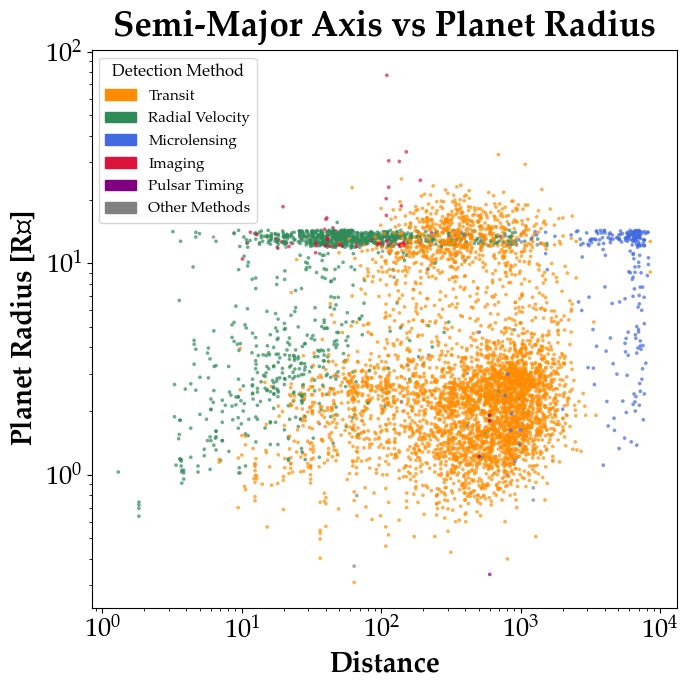

In [771]:
x = exo_df['Distance']
y = exo_df['Planet Radius']
methods = exo_df['Detection Method']

main_methods = {'Transit': 'darkorange','Radial Velocity': 'seagreen','Microlensing': 'royalblue','Imaging': 'crimson','Pulsar Timing': 'purple'}

# Default color for less common methods
default_color = 'gray'
colors = methods.map(lambda m: main_methods.get(m, default_color))
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(x, y, c=colors, s=7, edgecolors='none', alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Planet Radius [R$🜨$]')
plt.title('Semi-Major Axis vs Planet Radius')

legend_elements = [mpatches.Patch(color=color, label=method)
    for method, color in main_methods.items()
]
legend_elements.append(mpatches.Patch(color=default_color, label='Other Methods'))
plt.legend(handles=legend_elements, title='Detection Method', fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()

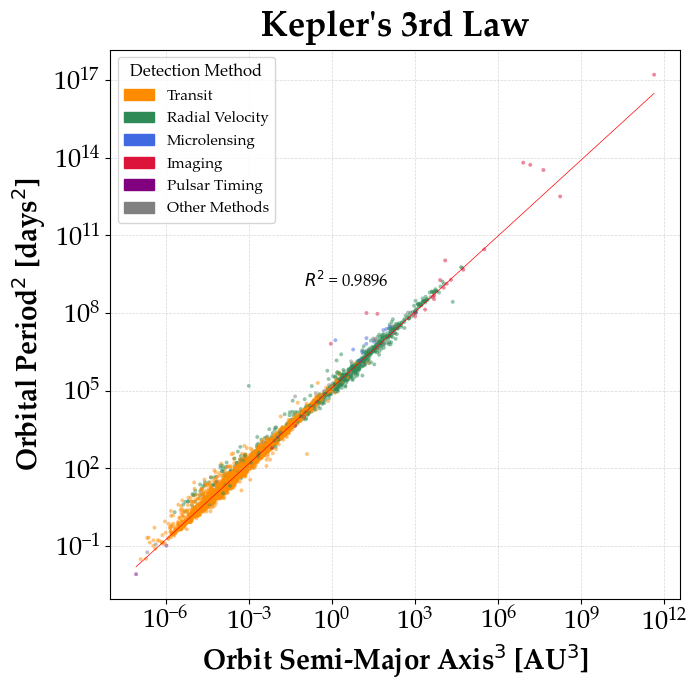

In [772]:
# Here we will plot kepler 3 rd law law to valdiate the datasets observations
a = exo_df['Orbit Semi-Major Axis']
p = exo_df['Orbital Period']
methods = exo_df['Detection Method']

# Remove invalid entries
mask = np.isfinite(a) & np.isfinite(p)
a = a[mask]
p = p[mask]
methods = methods[mask]

# Kepler's 3rd law: a^3 ~ p^2
a_cubed = a ** 3
p_squared = p ** 2

# Log transform for linear fitting
log_a = np.log10(a_cubed)
log_p = np.log10(p_squared)

# Linear model fit
model = models.Linear1D()
fitter = fitting.LinearLSQFitter()
fit = fitter(model, log_a, log_p)

# R-squared value
r_squared = np.corrcoef(log_a, log_p)[0, 1] ** 2

main_methods = {'Transit': 'darkorange','Radial Velocity': 'seagreen','Microlensing': 'royalblue','Imaging': 'crimson','Pulsar Timing': 'purple'}
default_color = 'gray'
colors = methods.map(lambda m: main_methods.get(m, default_color))
plt.figure()
plt.scatter(a_cubed, p_squared, c=colors, s=8, edgecolors='none', alpha=0.5)

# Best-fit line
a_fit = np.linspace(a_cubed.min(), a_cubed.max(), 500)
log_a_fit = np.log10(a_fit)
p_fit = 10 ** fit(log_a_fit)
plt.plot(a_fit, p_fit, color='red', linewidth=0.5, label='Best Fit')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Orbit Semi-Major Axis$^3$ [AU$^3$]')
plt.ylabel(r'Orbital Period$^2$ [days$^2$]')
plt.title("Kepler's 3rd Law")
plt.text(1e-1, 1e9, f"$R^2$ = {r_squared:.4f}", fontsize=12)

# Legend
legend_elements = [mpatches.Patch(color=color, label=method)
    for method, color in main_methods.items()]
legend_elements.append(mpatches.Patch(color=default_color, label='Other Methods'))
plt.legend(handles=legend_elements, title='Detection Method', fontsize=11, title_fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

The current techniques are usually sensitive only to systems with orbital periods a factor of a few shorter than the duration of observations. From the plots above, you can observes that most of the exoplanets are confined in massive-planets with short-period ranges shorter than earth. 
In contrast, studies of planet occurrence have shown that long-period, small-radius planets are the most common outcome of planet formation in the Milky Way [4].

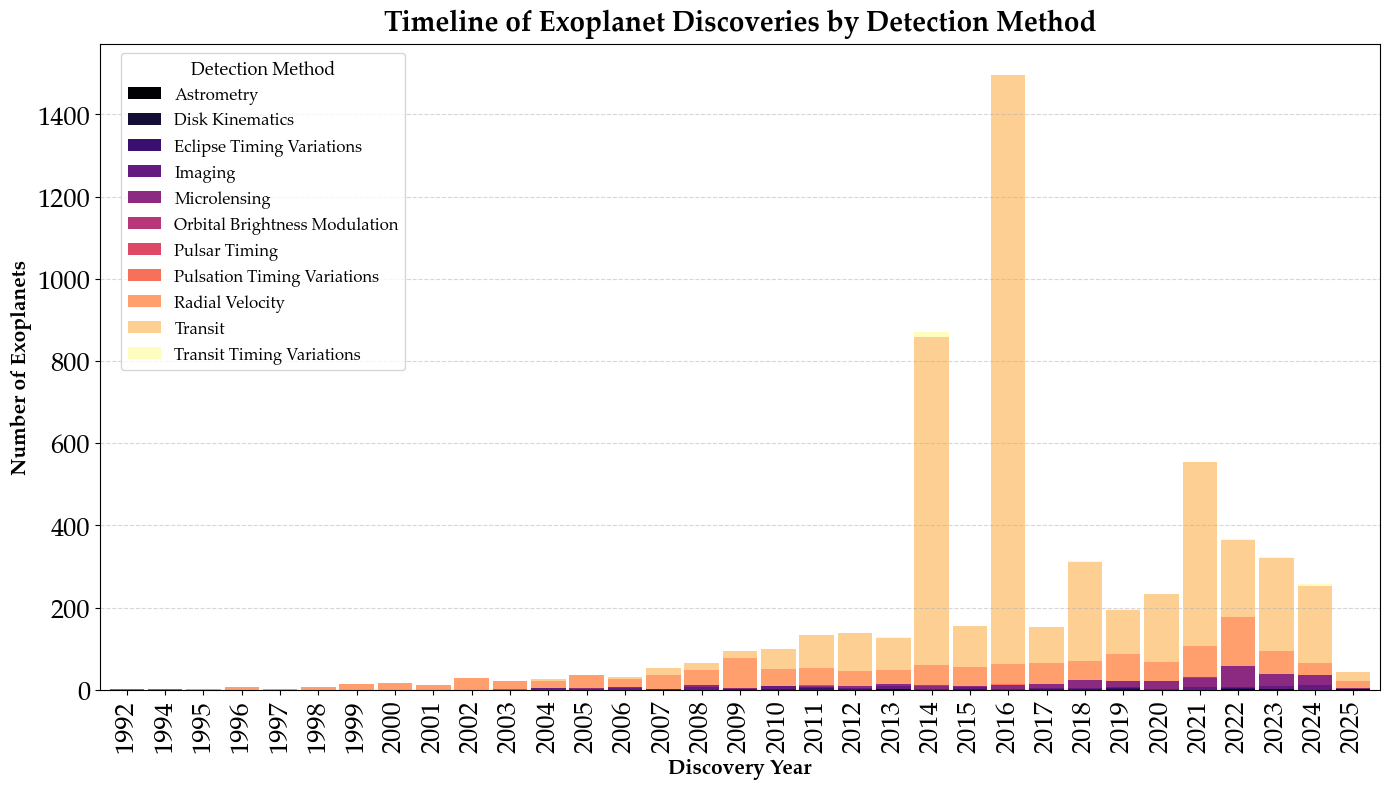

In [774]:
method_timeline = exo_df.groupby(['Discovery Year', 'Detection Method']).size().unstack(fill_value=0)
method_timeline = method_timeline.sort_index()
plt.figure(figsize=(14, 8))
method_timeline.plot(kind='bar',stacked=True,colormap='magma',width=0.9,ax=plt.gca())

plt.title('Timeline of Exoplanet Discoveries by Detection Method', fontsize=20, weight='bold')
plt.xlabel('Discovery Year', fontsize=15)
plt.ylabel('Number of Exoplanets', fontsize=15)

plt.legend(title='Detection Method',loc='upper left',bbox_to_anchor=(0.01, 1),frameon=True,fontsize=12,title_fontsize=13)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

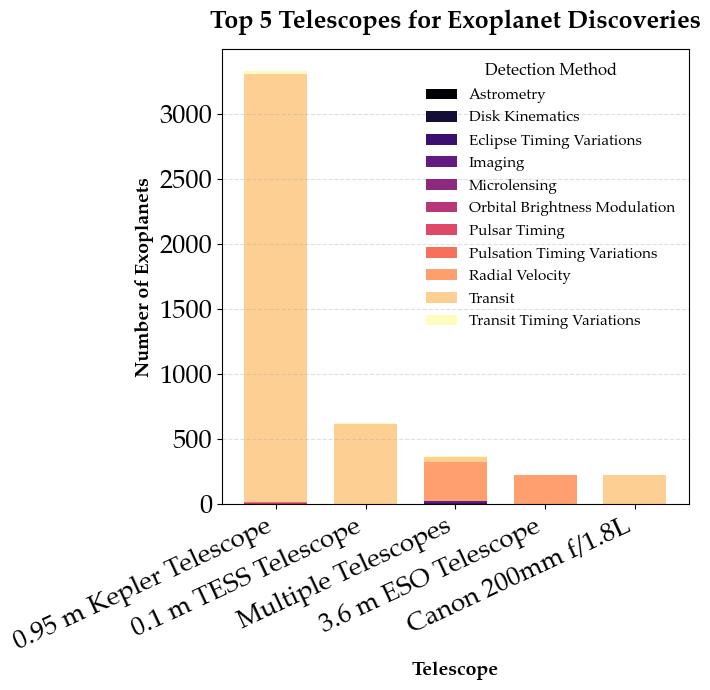

In [775]:
telescope_method = exo_df.groupby(['Discovery Telescope', 'Detection Method']).size().unstack(fill_value=0)

top_telescopes = telescope_method.sum(axis=1).nlargest(5).index
telescope_method_top5 = telescope_method.loc[top_telescopes]

plt.figure()

telescope_method_top5.plot(kind='bar',stacked=True,colormap='magma',width=0.7,ax=plt.gca())

plt.title('Top 5 Telescopes for Exoplanet Discoveries', fontsize=18, weight='bold', pad=15)
plt.xlabel('Telescope', fontsize=14)
plt.ylabel('Number of Exoplanets', fontsize=14)
plt.xticks(rotation=25, ha='right')

plt.legend( title='Detection Method', loc='upper right', bbox_to_anchor=(1.0, 1.0), frameon=False, fontsize=11, title_fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

Over the years, the discovery of exoplanets has increased, reaching its peak in 2016 (one catalog with over 1,200 discoveries was published). The Kepler telescope holds the record for the highest number of discoveries (over 3,000 detections).

# 2 Planet radius Charatristic

Some planets does not have radii, we will use some assumptions to handel the nulls
- Chen & Kipping 2017 

In [779]:
def estimate_radius_from_mass(mass):
    if pd.isna(mass):
        return None
    elif mass < 2.04:
        return mass ** 0.279  # Terrestrial regime
    elif mass < 132:
        return 1.008 * (mass ** 0.589)  # Neptune-like regime
    else:
        return 17.7 * (mass ** -0.044)  # Gas giant regime

# Apply only to missing Planet Radius values
exo_df.loc[exo_df['Planet Radius'].isna(), 'Planet Radius'] = (
    exo_df.loc[exo_df['Planet Radius'].isna(), 'Planet Mass']
    .apply(estimate_radius_from_mass)
)

In [780]:
# Note: Nasa officile web dosent have sub-neptune, also, there is uknown ones
def classify_planet(radius):
    if pd.isna(radius):
        return None
    elif radius < 1.25:
        return 'Terrestrial'
    elif radius < 2.5:
        return 'Super-Earth'
    elif radius < 4.0:
        return 'Sub-Neptune'
    elif radius < 6.0:
        return 'Neptune-like'
    else:
        return 'Gas Giant'

In [781]:
exo_df['Planet Type'] = exo_df['Planet Radius'].apply(classify_planet)
exo_df.copy()

,Planet Name,Host Name,Number of Stars,Number of Planets,Number of Moons,Detection Method,Discovery Year,Discovery Locale,Discovery Facility,Discovery Telescope,Orbital Period,Orbit Semi-Major Axis,pl_angsep,Planet Radius,Radius [Jupiter],Planet Mass,Mass [Jupiter],Mass Provenance,Planet Density,Eccentricity,Insolation Flux,Equilibrium Temperature,Inclination,Spectral Type,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Metallicity,Metallicity Ratio,Stellar Luminosity,Surface Gravity,Stellar Age,Stellar Density,Rotational Velocity,Rotation Period,Radial Velocity,RA [sexagesimal],RA [degree],Proper Motion,Distance,Parallax,B Magnitude,V Magnitude,Planet Type
0,11 Com b,11 Com,2,1,0,Radial Velocity,2007,Ground,Xinglong Station,2.16 m Telescope,323.210000,1.178000,12.60,12.2,1.09,4914.898486,15.4640,Msini,14.900,0.2380,NaN,NaN,NaN,G8 III,4874.00,13.76,2.09,-0.2600,[Fe/H],1.97823,2.450000,NaN,NaN,1.20,NaN,43.36898,12h20m42.91s,185.178779,140.383627,93.1846,10.71040,5.726,4.72307,Gas Giant
1,11 UMi b,11 UMi,1,1,0,Radial Velocity,2009,Ground,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,516.219970,1.530000,12.20,12.3,1.09,4684.814200,14.7400,Msini,13.800,0.0800,NaN,NaN,NaN,K4 III,4213.00,29.79,2.78,-0.0200,[Fe/H],2.42951,1.930000,1.56,NaN,1.50,NaN,-17.52023,15h17m05.90s,229.274595,10.679019,125.3210,7.95388,6.382,5.01300,Gas Giant
2,14 And b,14 And,1,1,0,Radial Velocity,2008,Ground,Okayama Astrophysical Observatory,1.88 m Telescope,186.760000,0.775000,10.30,13.1,1.16,1131.151301,3.5590,Msini,2.760,0.0000,NaN,NaN,NaN,K0 III,4888.00,11.55,1.78,-0.2100,[Fe/H],1.83992,2.550000,4.50,NaN,2.60,NaN,-59.72633,23h31m17.80s,352.824150,299.252618,75.4392,13.22890,6.256,5.23133,Gas Giant
3,14 Her b,14 Her,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,1765.038900,2.774000,155.00,12.6,1.12,2559.472162,8.0530,Mass,7.030,0.3730,NaN,NaN,144.652,K0 V,5338.00,0.93,0.91,0.4052,[Fe/H],-0.15273,4.450000,3.90,1.273928,1.00,NaN,-13.82260,16h10m24.50s,242.602101,324.530306,17.9323,55.73630,7.495,6.61935,Gas Giant
4,16 Cyg B b,16 Cyg B,3,1,0,Radial Velocity,1996,Ground,Multiple Observatories,Multiple Telescopes,798.500000,1.660000,78.50,13.5,1.20,565.737400,1.7800,Msini,1.260,0.6800,NaN,NaN,NaN,G3 V,5750.00,1.13,1.08,0.0600,[Fe/H],0.09729,4.360000,7.40,1.011029,2.70,NaN,-28.10000,19h41m51.75s,295.465642,211.122213,21.1397,47.27540,6.876,6.21500,Gas Giant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,ups And b,ups And,2,3,0,Radial Velocity,1996,Ground,Lick Observatory,3.0 m C. Donald Shane Telescope,4.617033,0.059222,4.42,14.0,1.25,218.531000,0.6876,Msini,0.438,0.0215,NaN,NaN,NaN,F8 V,6156.77,1.56,1.30,0.1014,[M/H],0.52541,4.125176,5.00,0.369930,9.20,12.0,-28.65500,01h36m47.60s,24.198353,419.857418,13.4054,74.57110,4.625,4.09565,Gas Giant
5872,ups And c,ups And,2,3,0,Radial Velocity,1999,Ground,Multiple Observatories,Multiple Telescopes,241.258000,0.827774,61.70,12.3,1.10,4443.241130,13.9800,Mass,13.100,0.2596,NaN,NaN,NaN,F8 V,6156.77,1.56,1.30,0.1014,[M/H],0.52541,4.125176,5.00,0.369930,9.60,12.0,-28.65500,01h36m47.60s,24.198353,419.857418,13.4054,74.57110,4.625,4.09565,Gas Giant
5873,ups And d,ups And,2,3,0,Radial Velocity,1999,Ground,Multiple Observatories,Multiple Telescopes,1276.460000,2.513290,187.00,12.5,1.11,3257.741172,10.2500,Mass,9.170,0.2987,NaN,NaN,NaN,F8 V,6156.77,1.56,1.30,0.1014,[M/H],0.52541,4.125176,5.00,0.369930,9.60,12.0,-28.65500,01h36m47.60s,24.198353,419.857418,13.4054,74.57110,4.625,4.09565,Gas Giant
5874,ups Leo b,ups Leo,1,1,0,Radial Velocity,2021,Ground,Okayama Astrophysical Observatory,1.88 m Telescope,385.200000,1.180000,22.40,14.2,1.27,162.092488,0.5100,Msini,0.311,0.3200,NaN,NaN,NaN,G9 III,4836.00,11.22,1.48,-0.2000,[Fe/H],1.80003,2.460000,NaN,NaN,1.78,NaN,NaN,11h36m56.93s,174.237219,42.335113,52.5973,18.99390,5.296,4.30490,Gas 

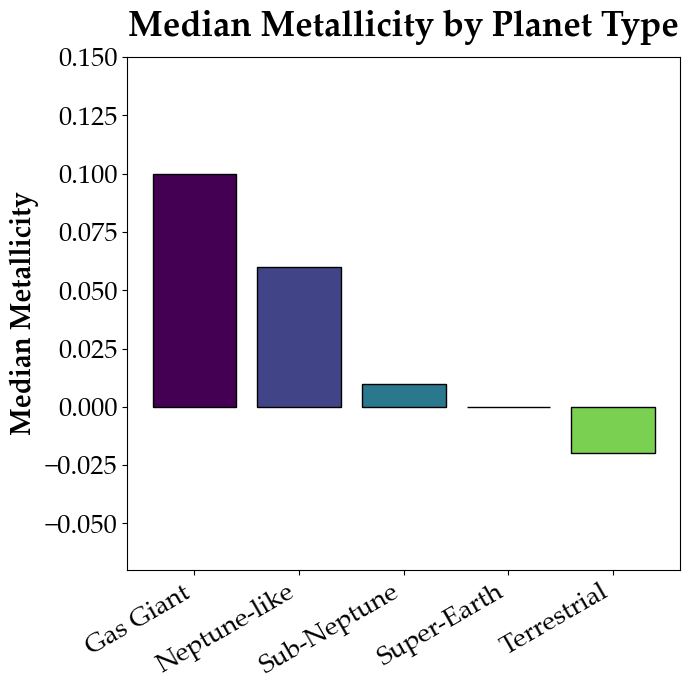

In [782]:
# Calculating median metallicity per planet type
median_metallicities = (
    exo_df.groupby('Planet Type')['Metallicity']
    .median()
    .sort_values(ascending=False)
).reset_index()
# Setup x and y for plotting
x = range(len(median_metallicities))
y = median_metallicities['Metallicity']
labels = median_metallicities['Planet Type']
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(x)) for i in x]

plt.figure()
bars = plt.bar(x, y, color=colors, edgecolor='k')

plt.title('Median Metallicity by Planet Type', weight='bold', pad=15)
plt.ylabel('Median Metallicity')
plt.xticks(ticks=x, labels=labels, rotation=30, ha='right')

plt.ylim(y.min() - 0.05, y.max() + 0.05)

plt.tight_layout()
plt.show()

**Planet with low metallicity are the ones with more habitability potential. Rocky planets (Terrestrial, Super-Earth).**

<div align="center">
  <img src="https://www.mpic.de/5368775/teaser-1681888786.jpg?t=eyJ3aWR0aCI6MTIwMCwiaGVpZ2h0IjpudWxsLCJmaXQiOm51bGwsIm9ial9pZCI6NTM2ODc3NX0%3D--0a12d932457c0bc36d64835a83097d6ef8e4e5dc" alt="Rocky Planets" width="500"/>
</div>


<p style="
    background-color: #0A0A0A;
    color: #C2A9D9;
    font-size: 200%;
    font-weight: bold;
    text-align: center;
    border-radius: 0px;
    border: 2px solid #BC13FE;
    padding: 12px 20px;
    text-shadow: 0 0 8px #BC13FE, 0 0 20px rgba(188, 19, 254, 0.6);
    box-shadow: 0 0 15px rgba(188, 19, 254, 0.5);
    font-family: 'Orbitron', 'Arial Black', sans-serif;
    letter-spacing: 1.5px;
    text-transform: uppercase;
    ">A city of stars</p>

# 3 Stellar Properties 

## 3.1 Spectral Clasification
How can we reach a star’s surface and study the temperature of its photosphere without vaporizing? The answer lies in light specifically, the electromagnetic spectrum we observe with our telescopes.The spectrum we receive (for example, sunlight takes about 8 minutes to reach Earth!) reveals a wealth of information about a star’s **chemical composition**, **temperature**, and **spectral type**.
Our Sun, for instance, Its spectrum shows that it is a **G-type main-sequence star**, meaning it is relatively hot, with a surface temperature of approximately **5700 K**. Other stars, such as red dwarfs, are cooler and denser, and their spectral features reflect those differences[6].
By observing and analyzing the spectra of thousands of stars, we can **digitize the night sky** and build massive datasets.

<div align="center">
  <img src="https://cdn.prod.website-files.com/621e95f9ac30687a56e4297e/65dcff54b51d4c7416b84813_V2_1689166277806_2afb3a9a-2533-43af-9d4f-a8ffb4a5cace_HIGH_RES.png" width="400">
</div>

The star's intrinsic brightness of a star(The luminosity) is the a measure of how much the star emits a light in a given time. It is the rate of the emited energy as electromagnetic radation (EM)[6]. Now, what if we plot the luminosity with the surface tempreture for each given star? 

In [788]:
# The Spectral Class column is giving Luminosity-Spectral Class, we wsnt to see the spectral type to visual the stars in groups, so we need to extract it from the full spectral class
exo_df[['Spectral Class', 'Subclass', 'Luminosity Class']] = exo_df['Spectral Type'].str.extract(r'([OBAFGKM])(\d)?\s*(I{1,3}|IV|V)?')
HR_df = exo_df[['Stellar Effective Temperature', 'Stellar Luminosity', 'Spectral Class']].dropna()
HR_df=HR_df[(HR_df['Stellar Effective Temperature']>2000)&(HR_df['Stellar Effective Temperature']<10000)]
HR_df=HR_df[HR_df['Stellar Luminosity']>0]

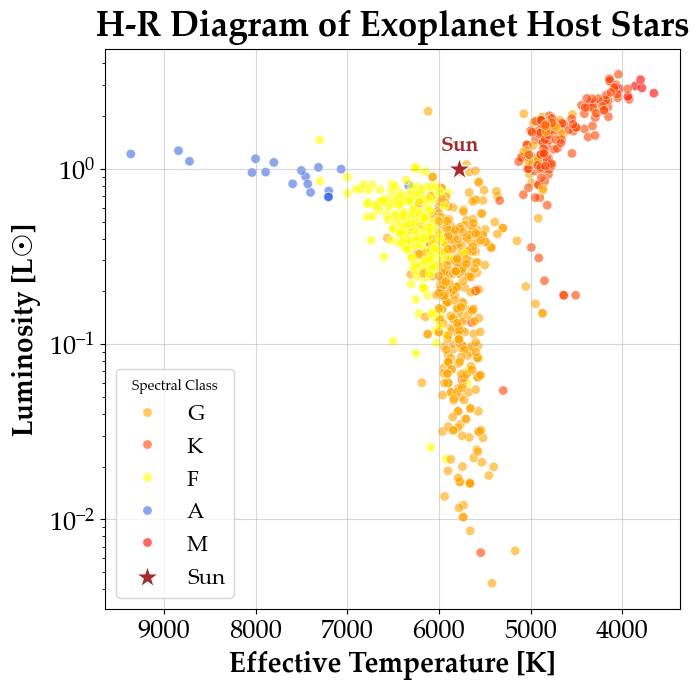

In [789]:
# Ploting the luminosity along with the surface tempreture for each star
x=HR_df['Stellar Effective Temperature']
y=HR_df['Stellar Luminosity']

# Assigining colors to each spectral type
stars={
    'O': 'darkblue',  
    'B': 'blue',   
    'A': 'royalblue',   
    'F': 'yellow',   
    'G': 'orange', 
    'K': 'orangered', 
    'M': 'red'
    }

plt.figure()
sns.scatterplot(
    data=HR_df, 
    x='Stellar Effective Temperature', 
    y='Stellar Luminosity', 
    hue='Spectral Class', 
    palette=stars,
    s=45,
    alpha=0.6)

# Highlight the Sun
Sun_Temp = 5778
Sun_Lum = 1
plt.scatter(Sun_Temp, Sun_Lum, color='brown', s=300, edgecolors='white', marker='*', zorder=10, label='Sun')
plt.text(Sun_Temp + 200, Sun_Lum * 1.3, 'Sun', color='brown', fontsize=15, weight='bold')

plt.gca().invert_xaxis()  # Hotter stars on the left
plt.yscale('log')
plt.xlabel('Effective Temperature [K]')
plt.ylabel('Luminosity [L$☉$]')
plt.title('H-R Diagram of Exoplanet Host Stars')
plt.grid(True)
plt.legend(title='Spectral Class', loc='best')
plt.tight_layout()
plt.show()

This is **Hertsprung-Russel diagram**, the stars fell along a broad band from the upper left are (Hot and luminous) While the lower right ones are (Cool and dim) stars. Furthermore, the plot shows a diagnoal from upper left to lower right, this called "The main sequence stars"[6].

The star's spectral type and lifetime determine the long-term habitability zone. For a planet to be habitible, we need a starhost to be in *late F* or *G*, to *mid-K*, ( *7,000 K down to a little less than 4,000 K* ). Thats because they live at least a few hundred million years, allowing life a chance to evolve."

*"A 2020 study found that about half of Sun-like stars could host rocky, potentially habitable planets. Specifically, they estimated that, on average, the nearest habitable zone planet around G and K-type stars is about 6 parsecs away, and there are about 4 rocky planets around G and K-type stars within 10 parsecs (32.6 light years) of the Sun"*

## 3.2 Luminosity Types
  - A star’s **B-V color index** is the difference between its magnitude in the **B (blue)** and **V (visual/green-yellow)** bands.
  - Lower values (or negative) → **bluer**, hotter stars.
  - Higher values → **redder**, cooler stars.
---
  $$
  M_v = m_v - 5 \cdot (\log_{10}(d) - 1)
  $$[6]
  Where:
  - $$ M_v $$ = absolute magnitude (Given as the flux here)
  - $$ m_v $$ = apparent magnitude (The luminosity)
  - $$d$$ = distance in parsecs

In [793]:
exo_df['B-V'] = exo_df['B Magnitude'] - exo_df['V Magnitude']
# Calculate the apperaent magnitude
exo_df['Mv'] = exo_df['V Magnitude'] - 5 * (np.log10(exo_df['Distance']) - 1)

df_color = exo_df[['B-V', 'Mv','Luminosity Class']].dropna()
df_color = df_color[(df_color['B-V'] > -0.5) & (df_color['B-V'] < 2.5)]
df_color = df_color[(df_color['Mv'] > -10) & (df_color['Mv'] < 20)]

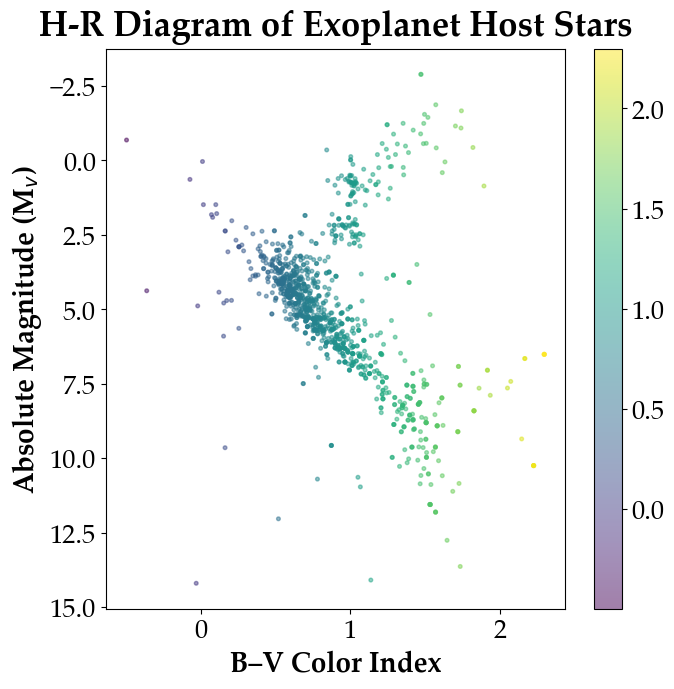

In [794]:
x=df_color['B-V']
y=df_color['Mv']
plt.figure()
plt.scatter(x,y, s=7, c=x, cmap='viridis', alpha=0.5)

plt.gca().invert_yaxis()  # Brighter stars on top
plt.xlabel('B–V Color Index')
plt.ylabel('Absolute Magnitude (M$_v$)')
plt.title('H-R Diagram of Exoplanet Host Stars')
plt.colorbar()
plt.tight_layout()
plt.show()

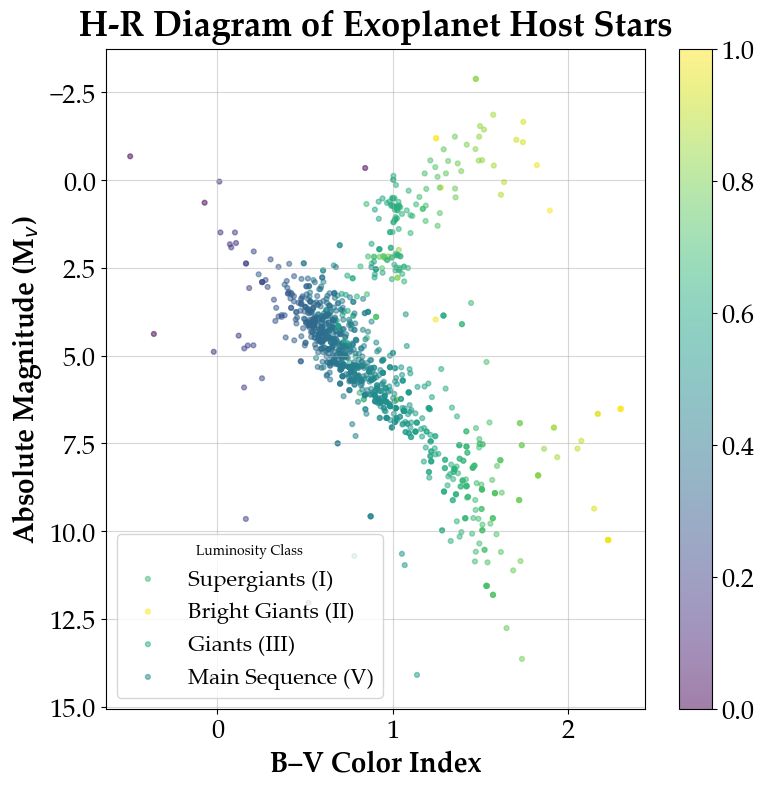

In [795]:
luminosity_labels = {
    'I': 'Supergiants (I)',
    'II': 'Bright Giants (II)',
    'III': 'Giants (III)',
    'IV': 'Subgiants (IV)',
    'V': 'Main Sequence (V)'
}

plt.figure(figsize=(8, 8))

for lum_class, group in df_color.groupby('Luminosity Class'):
    label = luminosity_labels.get(lum_class, f'Other ({lum_class})') 
    plt.scatter(group['B-V'], group['Mv'],s=12,alpha=0.5,c=group['B-V'],cmap='viridis',label=label)

# Brighter stars on top
plt.gca().invert_yaxis()

# Labels
plt.xlabel('B–V Color Index')
plt.ylabel('Absolute Magnitude (M$_v$)')
plt.title('H-R Diagram of Exoplanet Host Stars')

sc = plt.scatter([], [], c=[], cmap='viridis',alpha=0.5)
cbar = plt.colorbar(sc)

plt.legend(title='Luminosity Class', loc='lower left')

plt.grid()
plt.tight_layout()
plt.show()

In [796]:
# I will select the stars within the potential of habitability, specially sun-like stars:
def select_main_sequence(exo_df):
    # for main-sequence stars
    condition_mass = (exo_df['Stellar Mass'] >= 0.08) & (exo_df['Stellar Mass'] <= 2.0)
    condition_radius = (exo_df['Stellar Radius'] >= 0.1) & (exo_df['Stellar Radius'] <= 2.5)
    condition_teff = (exo_df['Stellar Effective Temperature'] >= 2600) & (exo_df['Stellar Effective Temperature'] <= 10000)
    main_sequence = condition_mass & condition_radius & condition_teff
    # Apply filter
    main_sequence = exo_df[main_sequence]
    return main_sequence

In [797]:
main_sequence_df = select_main_sequence(exo_df)
main_sequence_df=pd.DataFrame(main_sequence_df)

**As observed, main sequence stars (luminosity Class V) are especially significant in the search for habitable planets**

# 4 Planets Habitabilaty 

The planet have been considered to be habitible just if it falls within the habitible zone, for the first approximation. However, our Moon is a rocky celestial body, located in the HZ, but without any potential to support life. In order to get better habitible candidates, we need to apply specific measures or scale that will increase the chance of the planet habitabilaty:

    1- The planet should be orbiting a main-sequence star
    2- Checking the optimal HZ according to [2]
    3- The planet should be terrestial, or super-earth for low-metallicity
    4- Earth Similarity index (ESI) scale to measure the how potential the planet resembles earth. 

## 4.2 Circumstellar Habitable Zone (CHZ)

In [802]:
# Adding the planet habitability column
main_sequence_df[['Habitability', 'HZ Inner (AU)', 'HZ Outer (AU)']] = main_sequence_df.apply(
    classify_habitable_zone, axis=1, result_type='expand'
)
main_sequence_df

,Planet Name,Host Name,Number of Stars,Number of Planets,Number of Moons,Detection Method,Discovery Year,Discovery Locale,Discovery Facility,Discovery Telescope,Orbital Period,Orbit Semi-Major Axis,pl_angsep,Planet Radius,Radius [Jupiter],Planet Mass,Mass [Jupiter],Mass Provenance,Planet Density,Eccentricity,Insolation Flux,Equilibrium Temperature,Inclination,Spectral Type,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Metallicity,Metallicity Ratio,Stellar Luminosity,Surface Gravity,Stellar Age,Stellar Density,Rotational Velocity,Rotation Period,Radial Velocity,RA [sexagesimal],RA [degree],Proper Motion,Distance,Parallax,B Magnitude,V Magnitude,Planet Type,Spectral Class,Subclass,Luminosity Class,B-V,Mv,Habitability,HZ Inner (AU),HZ Outer (AU)
3,14 Her b,14 Her,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,1765.038900,2.774000,155.00,12.600,1.120,2559.472162,8.053000,Mass,7.030,0.3730,NaN,NaN,144.652,K0 V,5338.00,0.93000,0.910,0.4052,[Fe/H],-0.15273,4.450000,3.9000,1.273928,1.00,NaN,-13.8226,16h10m24.50s,242.602101,324.530306,17.93230,55.73630,7.495,6.61935,Gas Giant,K,0,V,0.87565,5.351170,Not Habitable,0.640622,1.538818
4,16 Cyg B b,16 Cyg B,3,1,0,Radial Velocity,1996,Ground,Multiple Observatories,Multiple Telescopes,798.500000,1.660000,78.50,13.500,1.200,565.737400,1.780000,Msini,1.260,0.6800,NaN,NaN,NaN,G3 V,5750.00,1.13000,1.080,0.0600,[Fe/H],0.09729,4.360000,7.4000,1.011029,2.70,NaN,-28.1000,19h41m51.75s,295.465642,211.122213,21.13970,47.27540,6.876,6.21500,Gas Giant,G,3,V,0.66100,4.589506,Habitable,0.840258,1.980176
7,1RXS J160929.1-210524 b,1RXS J160929.1-210524,1,1,0,Imaging,2008,Ground,Gemini Observatory,8.19 m Gemini North Telescope,NaN,330.000000,2370.00,18.647,1.664,3000.000000,8.000000,Mass,2.540,NaN,NaN,1700.0,NaN,K7 V,4060.00,1.31316,0.850,NaN,NaN,-0.37000,3.995920,0.0050,0.387885,NaN,NaN,NaN,16h09m30.30s,242.376234,25.377170,139.13500,7.15949,14.168,12.61800,Gas Giant,K,7,V,1.55000,6.900818,Not Habitable,0.521557,1.335355
11,2M0437 b,2MASS J04372171+2651014,1,1,0,Imaging,2021,Ground,Subaru Telescope,8.2 m Subaru Telescope,NaN,118.000000,918.00,13.000,1.160,1271.313628,4.000000,Mass,3.180,NaN,NaN,1450.0,NaN,M V,3100.00,0.84000,0.170,0.0100,[Fe/H],-1.16368,4.500000,0.0025,3.320183,22.54,1.84,17.1000,04h37m21.73s,69.340553,28.336260,128.48400,7.75524,17.237,16.18600,Gas Giant,M,NaN,V,1.05100,10.641755,Not Habitable,0.213720,0.574662
13,2MASS J01225093-2439505 b,2MASS J01225093-2439505,1,1,0,Imaging,2013,Ground,W. M. Keck Observatory,10 m Keck II Telescope,NaN,52.000000,1540.00,11.209,1.000,7786.500000,24.500000,Mass,30.400,NaN,NaN,1600.0,NaN,M3.5 V,3530.00,0.36645,0.400,NaN,NaN,-1.72000,4.858040,0.1200,10.118676,NaN,NaN,9.6000,01h22m51.07s,20.712801,172.442667,33.82810,29.53260,15.706,14.24400,Gas Giant,M,3,NaN,1.46200,11.597612,Not Habitable,0.111696,0.293772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,tau Cet g,tau Cet,1,4,0,Radial Velocity,2017,Ground,Multiple Observatories,Multiple Telescopes,20.000000,0.133000,36.90,1.180,0.105,1.750000,0.005506,Msini,5.850,0.0600,NaN,NaN,NaN,G8.5V,5310.00,0.83000,0.783,-0.5200,[Fe/H],-0.30539,4.520000,12.1200,2.243584,1.80,34.50,-17.1000,01h44m02.23s,26.009303,1929.723852,3.60304,277.51600,4.220,3.49607,Terrestrial,G,8,NaN,0.72393,5.712725,Not Habitable,0.537966,1.293962
5869,tau Cet h,tau Cet,1,4,0,Radial Velocity,2017,Ground,Multiple Observatories,Multiple Telescopes,49.410000,0.243000,67.40,1.190,0.106,1.830000,0.005758,Msini,5.970,0.2300,NaN,NaN,NaN,G8.5V,5310.00,0.83000,0.783,-0.5200,[Fe/H],-0.30539,4.520000,12.1200,2.243584,1.80,34.50,-17.1000,01h44m02.23s,26.009303,1929.723852,3.60304,277.51600,4.220,3.49607,Terrestrial,G,8,NaN,0.72393,5.712725,Not Habitable,0.537966,1.293962
5871,ups And b,ups And,2,3,0,Radial Velocity,1996,Ground,Lick Observatory,3.0 m 

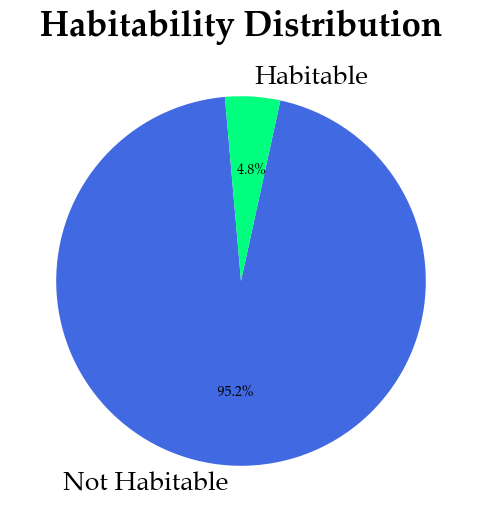

In [803]:
filtered_df = main_sequence_df[main_sequence_df['Habitability'] != "None"]

habitability_counts = filtered_df['Habitability'].value_counts()

colors = ['royalblue', 'springgreen']
habitability_counts.plot.pie(
    autopct='%5.1f%%',
    figsize=(6, 6), 
    startangle=95,
    colors=colors,
    title='Habitability Distribution'
)
plt.ylabel('')
plt.show()


## 4.2  Earth Similarity index (ESI)

In [805]:
# Apply the function 
esi_results = main_sequence_df .apply(
    calculate_esi,
    axis=1,
    args=(x_earth, weights)  
)

# Extract ESI and Escape Velocity
main_sequence_df ['ESI'] = esi_results.apply(lambda x: x['ESI'] if x is not None else None)
main_sequence_df ['Escape Velocity'] = esi_results.apply(lambda x: x['Escape Velocity'] if x is not None else None)

main_sequence_df [['Planet Name', 'ESI', 'Escape Velocity']].dropna().head()

,Planet Name,ESI,Escape Velocity
7,1RXS J160929.1-210524 b,0.080996,141.883194
11,2M0437 b,0.111029,110.618939
13,2MASS J01225093-2439505 b,0.068041,294.823790
16,2MASS J03590986+2009361 b,0.048752,242.229765
19,2MASS J11550485-7919108 b,0.043878,256.385514


In [806]:
pd.set_option('display.max_columns', None)
main_sequence_df

,Planet Name,Host Name,Number of Stars,Number of Planets,Number of Moons,Detection Method,Discovery Year,Discovery Locale,Discovery Facility,Discovery Telescope,Orbital Period,Orbit Semi-Major Axis,pl_angsep,Planet Radius,Radius [Jupiter],Planet Mass,Mass [Jupiter],Mass Provenance,Planet Density,Eccentricity,Insolation Flux,Equilibrium Temperature,Inclination,Spectral Type,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Metallicity,Metallicity Ratio,Stellar Luminosity,Surface Gravity,Stellar Age,Stellar Density,Rotational Velocity,Rotation Period,Radial Velocity,RA [sexagesimal],RA [degree],Proper Motion,Distance,Parallax,B Magnitude,V Magnitude,Planet Type,Spectral Class,Subclass,Luminosity Class,B-V,Mv,Habitability,HZ Inner (AU),HZ Outer (AU),ESI,Escape Velocity
3,14 Her b,14 Her,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,1765.038900,2.774000,155.00,12.600,1.120,2559.472162,8.053000,Mass,7.030,0.3730,NaN,NaN,144.652,K0 V,5338.00,0.93000,0.910,0.4052,[Fe/H],-0.15273,4.450000,3.9000,1.273928,1.00,NaN,-13.8226,16h10m24.50s,242.602101,324.530306,17.93230,55.73630,7.495,6.61935,Gas Giant,K,0,V,0.87565,5.351170,Not Habitable,0.640622,1.538818,NaN,NaN
4,16 Cyg B b,16 Cyg B,3,1,0,Radial Velocity,1996,Ground,Multiple Observatories,Multiple Telescopes,798.500000,1.660000,78.50,13.500,1.200,565.737400,1.780000,Msini,1.260,0.6800,NaN,NaN,NaN,G3 V,5750.00,1.13000,1.080,0.0600,[Fe/H],0.09729,4.360000,7.4000,1.011029,2.70,NaN,-28.1000,19h41m51.75s,295.465642,211.122213,21.13970,47.27540,6.876,6.21500,Gas Giant,G,3,V,0.66100,4.589506,Habitable,0.840258,1.980176,NaN,NaN
7,1RXS J160929.1-210524 b,1RXS J160929.1-210524,1,1,0,Imaging,2008,Ground,Gemini Observatory,8.19 m Gemini North Telescope,NaN,330.000000,2370.00,18.647,1.664,3000.000000,8.000000,Mass,2.540,NaN,NaN,1700.0,NaN,K7 V,4060.00,1.31316,0.850,NaN,NaN,-0.37000,3.995920,0.0050,0.387885,NaN,NaN,NaN,16h09m30.30s,242.376234,25.377170,139.13500,7.15949,14.168,12.61800,Gas Giant,K,7,V,1.55000,6.900818,Not Habitable,0.521557,1.335355,0.080996,141.883194
11,2M0437 b,2MASS J04372171+2651014,1,1,0,Imaging,2021,Ground,Subaru Telescope,8.2 m Subaru Telescope,NaN,118.000000,918.00,13.000,1.160,1271.313628,4.000000,Mass,3.180,NaN,NaN,1450.0,NaN,M V,3100.00,0.84000,0.170,0.0100,[Fe/H],-1.16368,4.500000,0.0025,3.320183,22.54,1.84,17.1000,04h37m21.73s,69.340553,28.336260,128.48400,7.75524,17.237,16.18600,Gas Giant,M,NaN,V,1.05100,10.641755,Not Habitable,0.213720,0.574662,0.111029,110.618939
13,2MASS J01225093-2439505 b,2MASS J01225093-2439505,1,1,0,Imaging,2013,Ground,W. M. Keck Observatory,10 m Keck II Telescope,NaN,52.000000,1540.00,11.209,1.000,7786.500000,24.500000,Mass,30.400,NaN,NaN,1600.0,NaN,M3.5 V,3530.00,0.36645,0.400,NaN,NaN,-1.72000,4.858040,0.1200,10.118676,NaN,NaN,9.6000,01h22m51.07s,20.712801,172.442667,33.82810,29.53260,15.706,14.24400,Gas Giant,M,3,NaN,1.46200,11.597612,Not Habitable,0.111696,0.293772,0.068041,294.823790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,tau Cet g,tau Cet,1,4,0,Radial Velocity,2017,Ground,Multiple Observatories,Multiple Telescopes,20.000000,0.133000,36.90,1.180,0.105,1.750000,0.005506,Msini,5.850,0.0600,NaN,NaN,NaN,G8.5V,5310.00,0.83000,0.783,-0.5200,[Fe/H],-0.30539,4.520000,12.1200,2.243584,1.80,34.50,-17.1000,01h44m02.23s,26.009303,1929.723852,3.60304,277.51600,4.220,3.49607,Terrestrial,G,8,NaN,0.72393,5.712725,Not Habitable,0.537966,1.293962,NaN,NaN
5869,tau Cet h,tau Cet,1,4,0,Radial Velocity,2017,Ground,Multiple Observatories,Multiple Telescopes,49.410000,0.243000,67.40,1.190,0.106,1.830000,0.005758,Msini,5.970,0.2300,NaN,NaN,NaN,G8.5V,5310.00,0.83000,0.783,-0.5200,[Fe/H],-0.30539,4.520000,12.1200,2.243584,1.80,34.50,-17.1000,01h44m02.23s,26.009303,1929.723852,3.60304,277.51600,4.220,3.49607,Terrestrial,G,8,NaN,0.72393,5.712725,

**I will use the criteria mentioned above to isolate the most habitable planets, along with the measurble scales that I've calculated**

In [808]:
best_planet_types = ['Terrestrial', 'Super-Earth'] # Select Planets with Poor-metal stars
esi_threshold = 0.8 # Select Planets with highest ESI scores
main_sequence_df = main_sequence_df[
   (main_sequence_df['Planet Type'].isin(best_planet_types))
& # Select main-sequence stars to apply [2] model
(main_sequence_df['ESI'] >= esi_threshold)& 
(main_sequence_df['Habitability'] == 'Habitable')]

print(main_sequence_df.shape)
main_sequence_df

(21, 54)


,Planet Name,Host Name,Number of Stars,Number of Planets,Number of Moons,Detection Method,Discovery Year,Discovery Locale,Discovery Facility,Discovery Telescope,Orbital Period,Orbit Semi-Major Axis,pl_angsep,Planet Radius,Radius [Jupiter],Planet Mass,Mass [Jupiter],Mass Provenance,Planet Density,Eccentricity,Insolation Flux,Equilibrium Temperature,Inclination,Spectral Type,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Metallicity,Metallicity Ratio,Stellar Luminosity,Surface Gravity,Stellar Age,Stellar Density,Rotational Velocity,Rotation Period,Radial Velocity,RA [sexagesimal],RA [degree],Proper Motion,Distance,Parallax,B Magnitude,V Magnitude,Planet Type,Spectral Class,Subclass,Luminosity Class,B-V,Mv,Habitability,HZ Inner (AU),HZ Outer (AU),ESI,Escape Velocity
195,GJ 1002 b,GJ 1002,1,2,0,Radial Velocity,2022,Ground,Multiple Observatories,Multiple Telescopes,10.346500,0.04570,9.430,1.030,0.091900,1.080,0.003398,Msini,5.43,NaN,0.670,230.9,NaN,M5.5 V,3024.0,0.137000,0.1200,-0.250,[Fe/H],-2.85201,5.10000,NaN,55.442547,NaN,126.00,NaN,00h06m42.35s,1.676464,2059.507271,4.84867,206.213000,15.730,13.760,Terrestrial,M,5,NaN,1.970,15.331887,Habitable,0.030637,0.082708,0.844679,11.454288
1484,K2-18 b,K2-18,1,2,0,Transit,2015,Space,K2,0.95 m Kepler Telescope,32.939623,0.14290,3.760,2.370,0.211437,8.920,0.028065,Mass,4.11,0.200,1.005,284.0,89.5785,M2.5 V,3457.0,0.444516,0.4951,0.120,[Fe/H],-1.59688,4.78640,NaN,7.073183,NaN,39.63,0.65370,11h30m14.43s,172.560141,155.522262,38.02660,26.268600,14.991,13.477,Super-Earth,M,2,NaN,1.514,10.576563,Habitable,0.128906,0.340300,0.823959,21.701166
2609,Kepler-1410 b,Kepler-1410,1,1,0,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,60.866168,0.25430,0.693,1.780,0.158801,3.820,0.012000,M-R relationship,3.72,0.000,1.060,290.0,89.7500,NaN,4092.0,0.600000,0.6300,0.010,[Fe/H],-1.15800,4.67000,4.07,3.250000,NaN,14.09,NaN,19h22m02.47s,290.510293,5.900000,367.00000,NaN,17.988,16.319,Super-Earth,NaN,NaN,NaN,1.669,8.495670,Habitable,0.210333,0.537648,0.864149,16.386888
2746,Kepler-1512 b,Kepler-1512,1,1,0,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,20.359726,0.13693,0.845,1.180,0.105273,1.760,0.005530,M-R relationship,5.89,0.000,1.600,322.0,89.4500,NaN,4372.0,0.670000,0.7300,0.200,[Fe/H],-1.69500,4.64000,1.78,1.320000,NaN,10.00,-19.67069,19h17m05.88s,289.274498,24.295400,162.00000,3.171828,14.790,13.451,Terrestrial,NaN,NaN,NaN,1.339,7.403425,Habitable,0.112392,0.283240,0.887171,13.661241
2795,Kepler-1544 b,Kepler-1544,1,1,0,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,168.811174,0.54465,1.630,1.780,0.158801,3.820,0.012000,M-R relationship,3.72,0.000,0.833,269.0,89.7970,NaN,4886.0,0.740000,0.8100,0.020,[Fe/H],-0.60600,4.61000,2.34,2.110000,NaN,NaN,NaN,19h49m08.45s,297.285217,31.151694,335.09000,2.955400,15.491,14.287,Super-Earth,NaN,NaN,NaN,1.204,6.661193,Habitable,0.386838,0.949959,0.827298,16.386888
2913,Kepler-1638 b,Kepler-1638,1,1,0,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,259.336830,0.74500,0.488,1.870,0.166830,4.160,0.013100,M-R relationship,3.50,0.000,2.760,304.0,89.9954,NaN,5710.0,0.950000,0.9700,-0.010,[Fe/H],-0.11400,4.47000,4.37,0.404270,NaN,NaN,NaN,19h41m55.76s,295.482330,7.792291,1525.52000,0.626933,15.685,14.769,Super-Earth,NaN,NaN,NaN,0.916,3.851910,Habitable,0.659887,1.557909,0.822287,16.684019
2930,Kepler-1649 c,Kepler-1649,1,2,0,Transit,2020,Space,Kepler,0.95 m Kepler Telescope,19.535270,0.06490,0.704,1.060,0.094567,1.200,0.003770,M-R relationship,5.54,0.000,0.750,234.0,89.3390,NaN,3240.0,0.231700,0.1977,-0.150,[M/H],-2.28735,5.00400,NaN,22.919969,NaN,NaN,NaN,19h30m00.71s,292.502968,168.226095,92.19130,10.818700,NaN,17.950,Terrestrial,NaN,NaN,NaN,NaN,13.126550,Habitable,0.058467,0.156071,0.849775,11.901796
2935,Kepler-1652 b,Kepler-1652,1,1,0,Transit,2017,Space,Kepler,0.95 m Kepler Telescope,38.097220,0.16540,0.656,1.600,0.142742,3.190,0.010000,M-R relationship,4.28,0.000,0.810,268.0,89.9927,NaN,3638.0,0.382000,0.4040,-0.300,[Fe/H],-1.63800,4.87800,3.20,7.05000

In [809]:
h_planets=main_sequence_df['Planet Name'].unique()
print(f"The habitible planets candidates:{h_planets}")

The habitible planets candidates:['GJ 1002 b' 'K2-18 b' 'Kepler-1410 b' 'Kepler-1512 b' 'Kepler-1544 b'
 'Kepler-1638 b' 'Kepler-1649 c' 'Kepler-1652 b' 'Kepler-1653 b'
 'Kepler-22 b' 'Kepler-296 e' 'Kepler-296 f' 'Kepler-442 b' 'Kepler-452 b'
 'Proxima Cen b' 'Ross 128 b' 'TOI-1266 d' 'TOI-700 d' 'TOI-700 e'
 "Teegarden's Star b" 'Wolf 1069 b']


**Planets with ESI values between 0.6 and 0.8 (such as Mars) may still offer potential for habitability, as true habitability depends on many additional factors beyond ESI alone** [3].  
With this in mind, my goal has been to refine the habitability criteria as much as possible. I applied several filters, beginning with the Habitable Zone (HZ) and extending to planetary characteristics such as size, the host star’s metallicity, and spectral type, and finally planets with earth similarity index >=0.8.  
After applying these filters, I identified 21 exoplanets that, according to the methods used, represent the most promising candidates for habitability.

# References

- [1] [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu)
- [2] Kopparapu, R. K., et al. (2014). *Habitable Zones Around Main-sequence Stars.*
- [3] Cardenas, R., & Hearnsaw, J. (2013). *Planetary Habitability Modeling.*
- [4] [Planetary Characterization 2024 Conference Paper](https://www.hou.usra.edu/meetings/planetcharacterization2024/pdf/2912.pdf)
- [5] [Metal-rich Stars and Planet Habitability – Max Planck Institute](https://www.mpic.de/5368702/unwirtliche-planeten-durch-metallreiche-sterne)
- [6] [Foundations of Astrophysics – Cambridge University Press](https://www.cambridge.org/highereducation/books/foundations-of-astrophysics/EC157954F91AF2EE427CEB2C12465F42#overview)